<a href="https://colab.research.google.com/github/anggithaycs/KMeans-no-libs/blob/master/KMeans_Youtube_DataFrame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

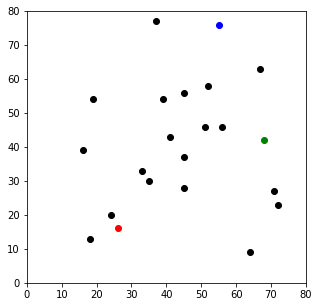

In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'x' : [16, 45, 24, 33, 19, 37, 56, 45, 45, 35, 51, 67, 52, 71, 18, 41, 64, 39, 72],
    'y' : [39, 56, 20, 33, 54, 77, 46, 37, 28, 30, 46, 63, 58, 27, 13, 43, 9, 54, 23]
})

np.random.seed(200)
k = 3

centroids = {
    i+1: [np.random.randint(0,80), np.random.randint(0,80)]
    for i in range(k)
}

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0, 80)
plt.ylim(0,80)
plt.show()

    x   y  distance_from_1  distance_from_2  distance_from_3  closet color
0  16  39        25.079872        52.086467        53.758720       1     r
1  45  56        44.283180        26.925824        22.360680       3     b
2  24  20         4.472136        49.193496        64.007812       1     r
3  33  33        18.384776        36.138622        48.301139       1     r
4  19  54        38.639358        50.447993        42.190046       1     r


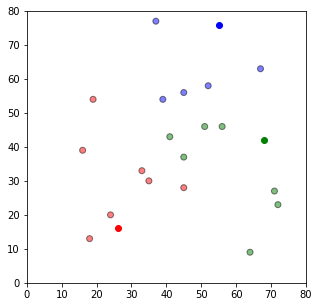

In [8]:

#Assignment Stage
def assignment(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closet'] = df.loc[:, centroid_distance_cols].idxmin(axis = 1)
    df['closet'] = df['closet'].map(lambda x : int(x.lstrip('distance_from_')))
    df['color'] = df['closet'].map(lambda x : colmap[x])
    return df

df = assignment(df,centroids)
print(df.head())

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

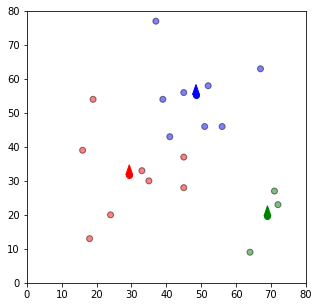

In [12]:
#Update Stage
import copy

old_centroids = copy.deepcopy(centroids)
def update(k):
  for i in centroids.keys():
    centroids[i][0] = np.mean(df[df['closet'] == i]['x'])
    centroids[i][1] = np.mean(df[df['closet'] == i]['y'])
  return k

centroids = update(centroids)

fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)

for i in old_centroids.keys():
  old_x = old_centroids[i][0]
  old_y = old_centroids[i][1]
  dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
  dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
  ax.arrow(old_x, old_y, dx, dy, head_width = 2, head_length=3, fc = colmap[i], ec= colmap[i])

plt.show()

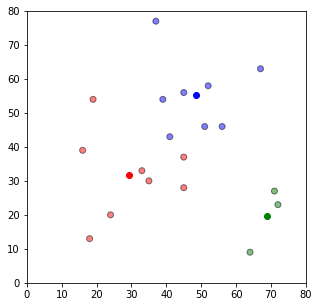

In [13]:
#Ulang assignment
df = assignment(df,centroids)

#Plot results
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

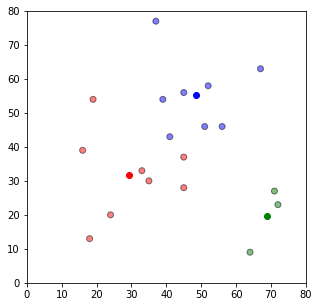

In [14]:
while True:
  closest_centroids = df['closet'].copy(deep=True)
  centroids = update(centroids)
  df = assignment(df, centroids)
  if closest_centroids.equals(df['closet']):
    break


#Plot results
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()